<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Linear_Regression_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Linear regression on advertising dataset
#https://www.kaggle.com/zebashaikh/linear-regression-on-advertising-dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dataset=pd.read_csv('https://pastebin.com/raw/JFACpGgf')
dataset.head()

#Dimesionality check
dataset.shape

#Data Wrangling/CLEANING
dataset.isna().any() # No missing values
dataset.dtypes # All are numeric column. Not categorical col is present

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

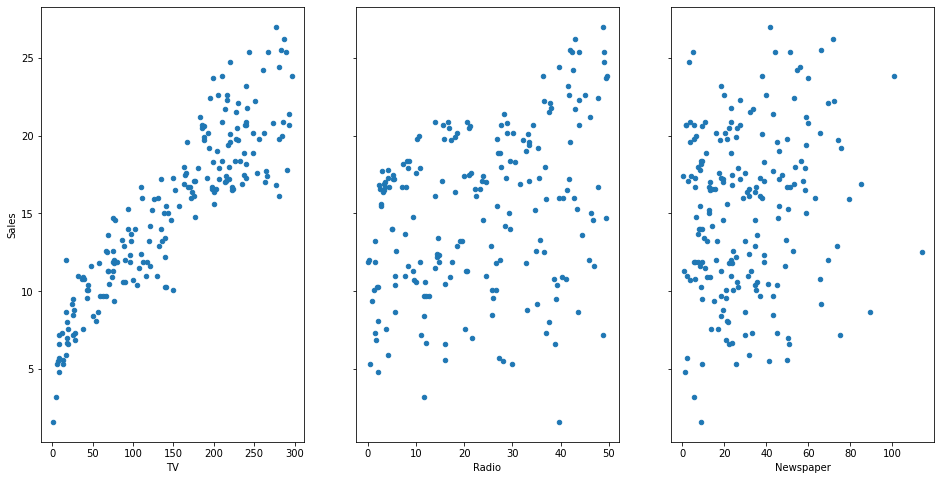

In [3]:
#Data visualization
import matplotlib.pyplot as plt
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
dataset.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
dataset.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
dataset.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

In [4]:
#FEATURES SELECTION
feature_x=['TV','Radio','Newspaper']
X=dataset[feature_x]
y=dataset.Sales
print(X,y)

#DATA PREP - TEST AND TRAINING SETS
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=30)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

#Creating Linear Regression Model¶
lm=LinearRegression()
lm.fit(xtrain,ytrain)
print(lm.intercept_,lm.coef_)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64
(140, 3) (140,) (60, 3) (60,)
4.63226201614081 [0.0549163  0.09294998 0.00974809]


In [5]:
#Model Prediction
x_new=pd.DataFrame({'TV':[50],
                   'Newspaper':[50],
                   'Radio':[50]})
x_new.head()

new_pred=lm.predict(x_new)
new_pred


array([12.5129803])

In [6]:

# lets predict on test data
preds=lm.predict(xtest)
print(preds)

from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(ytest,preds)))

[11.24165566 18.54198905 15.32606099 21.69995015 20.9611444   9.40310701
  9.1696167  20.19669709  9.44081563 16.07070663  9.35950623 16.95269259
 18.37251553 13.72930719  7.31713744 20.84229505 21.66378555 13.10536894
 22.50822167 25.12295054 11.53446926  9.1452506  20.25632692 16.22996665
 16.38039665 18.26251238  7.0119968  25.26711846 17.73078585 16.72426438
 18.88336095 14.05831936 23.40937087 13.61308451 21.89072688 19.58516873
 11.16861024  9.68594057 17.73129241  8.17300665 10.77024825  7.96479288
 12.55363262 17.7878794  18.13363602 24.31047015 21.45657863  7.74263354
 20.27320926  9.84421325 15.10134438 17.36117819 22.97429447 10.67823883
 19.03580712 20.27650114 10.51876901 21.31606485 19.72124335 19.21634152]
1.5992160546012557


In [7]:
#Linear Regression
#BOOK: Python®️ Machine Learning;Wei-Meng Lee, John Wiley and Sons,2019
#Boston DATASET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.data)
print(dataset.feature_names)
print(dataset.DESCR)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-ret

In [8]:
#The prices of houses is the information we are seeking, and it can be accessed
#via the target property:
print(dataset.target)

#Now let’s load the data into a Pandas DataFrame:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#You would also want to add the prices of the houses to the DataFrame
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#Data Cleansing
#The next step would be to clean the data and perform any conversion if necessary.
#First, use the info() function to check the data type of each field:
df.info()
#Next, we need to check to see if there are any missing values. To do so, use
#the isnull() function:
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [11]:
#Feature Selection
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS  ...         B     LSTAT      MEDV
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

In [12]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)
#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])
#Since RM and LSTAT have high correlation values, 
#we will use these two features to train our model.

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


Text(0, 0.5, 'MEDV')

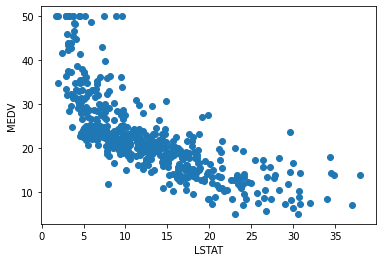

In [13]:
#Multiple Regression
#Now let’s plot a scatter plot showing the relationship between the LSTAT feature
#and the MEDV label:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

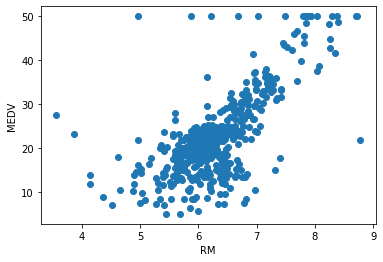

In [14]:
#Let’s also plot a scatter plot showing the relationship between the RM feature
#and the MEDV label:
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')


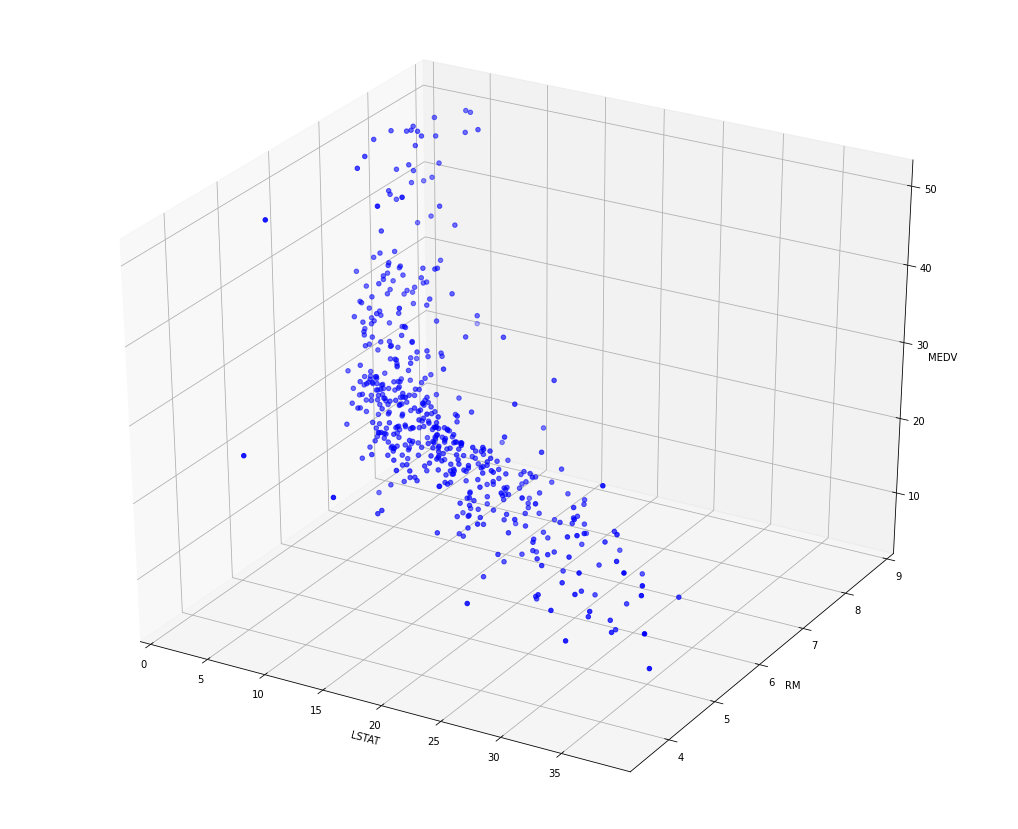

In [15]:
#Plot the two features and the label on a 3D chart:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
    df['RM'],
    df['MEDV'],
    c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [16]:

#We can now train the model. First, create two DataFrames: x and Y.
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
print(x,'\n')
#We will split the dataset into 70 percent for training and 30 percent for testing:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
random_state=5)

print(x_train.shape)
print(Y_train.shape)

#Let’s also print out the testing set:
print(x_test.shape)
print(Y_test.shape)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns] 

(354, 2)
(354,)
(152, 2)
(152,)


In [17]:
#We are now ready to begin the training. As you learned from the previous
#chapter, you can use the LinearRegression class to perform linear regression.
#In this case, we will use it to train our model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:

#Once the model is trained, we will use the testing set to perform some predictions:
price_pred = model.predict(x_test)
print(price_pred)

#To learn how well our model performed, we use the R-Squared method
print('R-Squared: %.4f' % model.score(x_test,Y_test))

[37.1689804  29.32035435 25.58027087  1.15646598 33.20707082  8.44197544
 30.37221305 27.57463198 26.12976704 22.01624296 32.13551356 22.87944818
 22.66492916 30.77766892 26.87728603 20.52649771  0.07700859 17.73715803
 12.4852138  21.5337132   5.41730621 23.83920281 37.59483142 24.38880315
 29.45572317 12.97936433 26.66174451 22.28532221 27.15672582 28.55285561
 11.92050914 10.73457063 18.04609262 25.06581211 26.04950614 22.86501105
 26.1328205  12.78655949 37.06519613 33.01820965 20.30298129  1.93992794
 27.34958946 16.72165643 27.15469487 29.58123631 -2.17117984 17.36152288
 20.6656613  14.2815521  20.69641698 21.34126367 24.86153667 16.4242525
 17.55536557 27.42110603 35.81573065 19.9548413  28.51674903 20.32610396
 20.05492026 22.80452284 16.55464235 30.90531655 22.41792004 13.19072701
 23.32544191 25.48850806 22.6711396  21.3650088  19.39396145 26.0214486
 16.76791647 20.44659086 19.48139777 29.92580392 19.25450197 13.28096308
 28.36799435 19.04982456 21.99396576 38.66237215 16.0

36.49422110915324
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
60     18.7
108    19.8
298    22.5
138    13.3
370    50.0
Name: MEDV, Length: 152, dtype: float64 [37.1689804  29.32035435 25.58027087  1.15646598 33.20707082  8.44197544
 30.37221305 27.57463198 26.12976704 22.01624296 32.13551356 22.87944818
 22.66492916 30.77766892 26.87728603 20.52649771  0.07700859 17.73715803
 12.4852138  21.5337132   5.41730621 23.83920281 37.59483142 24.38880315
 29.45572317 12.97936433 26.66174451 22.28532221 27.15672582 28.55285561
 11.92050914 10.73457063 18.04609262 25.06581211 26.04950614 22.86501105
 26.1328205  12.78655949 37.06519613 33.01820965 20.30298129  1.93992794
 27.34958946 16.72165643 27.15469487 29.58123631 -2.17117984 17.36152288
 20.6656613  14.2815521  20.69641698 21.34126367 24.86153667 16.4242525
 17.55536557 27.42110603 35.81573065 19.9548413  28.51674903 20.32610396
 20.05492026 22.80452284 16.55464235 30.90531655 22.41792004 13.19072701
 23.3254

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

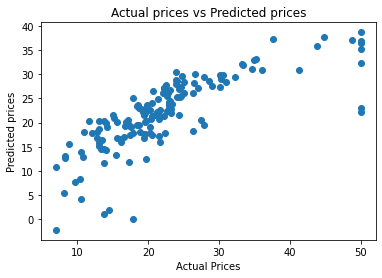

In [19]:

#We will also plot a scatter plot showing the actual price vs. the predicted price:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, price_pred)
print(mse)
print(Y_test, price_pred)
plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [20]:

#With the model trained, we can obtain the intercept as well as the coefficients
#of the features:
print(model.intercept_)
print(model.coef_)

#We can use the model to make a prediction for the house price when LSTAT
#is 30 and RM is 5:
print(model.predict([[30,5]]))

0.38437936780346504
[-0.65957972  4.83197581]
[4.75686695]


In [21]:
%matplotlib notebook



#Plotting the 3D Hyperplane
#Let’s plot a 3D regression hyperplane showing the predictions:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
            x['RM'],
            Y,
            c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")



#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)
#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>